Importing the libraries

In [77]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [78]:
tf.__version__

'2.16.1'

Data Preprocessing

In [79]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True
)
training_set = train_datagen.flow_from_directory(
    'seg_train',
    target_size= (155,155),
    batch_size= 32,
    class_mode= 'categorical'
    )

Found 14034 images belonging to 6 classes.


In [80]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'seg_test',
    target_size= (155,155),
    batch_size= 32,
    class_mode= 'categorical'
    )

Found 3000 images belonging to 6 classes.


Building the CNN

In [81]:
cnn = tf.keras.models.Sequential()

Convolution and Pooling

In [82]:
cnn.add(tf.keras.layers.Conv2D(filters= 42, kernel_size=3, activation= 'relu', input_shape= [155, 155, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Second Convolutional layer

In [83]:
cnn.add(tf.keras.layers.Conv2D(filters= 42, kernel_size=3, activation= 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flattining

In [84]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [85]:
cnn.add(tf.keras.layers.Dense(units=10, activation='relu'))

Output Layer

In [86]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

Compiling the CNN

In [87]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Trining the CNN

In [88]:
cnn.fit(x=training_set, validation_data=test_set, epochs=50)

Epoch 1/50


C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - accuracy: 0.3865 - loss: 1.5675 - val_accuracy: 0.4443 - val_loss: 1.3682
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 185ms/step - accuracy: 0.5488 - loss: 1.1609 - val_accuracy: 0.6143 - val_loss: 1.0283
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 193ms/step - accuracy: 0.6252 - loss: 1.0194 - val_accuracy: 0.6780 - val_loss: 0.9173
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 187ms/step - accuracy: 0.6902 - loss: 0.8790 - val_accuracy: 0.7663 - val_loss: 0.7453
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 83s 188ms/step - accuracy: 0.7582 - loss: 0.7258 - val_accuracy: 0.7760 - val_loss: 0.6466
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - accuracy: 0.7841 - loss: 0.6223 - val_accuracy: 0.7883 - val_loss: 0.6316
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 185ms/step - accuracy: 0.8085 - loss: 0.5514 - val_accuracy: 0.7840 - val_loss: 0.6319
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 185ms/step - accuracy: 0.8168 - loss: 0.5208 - val

Prediction

In [93]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import random

class_indices = training_set.class_indices
class_names = list(class_indices.keys())

files = os.listdir('seg_pred')

def display_random_image_and_predict():
    
    random_file = random.choice(files)
    test_random_image_path = os.path.join('seg_pred', random_file)

    test_image = load_img(test_random_image_path, target_size = (155, 155))
    
    plt.imshow(test_image)
    plt.title("Loaded Image")
    plt.axis('off')
    plt.show()
    
    test_image_array = img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)
    
    result = cnn.predict(test_image_array)

    predicted_class_index = np.argmax(result, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]
    print(f"Predicted class: {predicted_class_name} (index: {predicted_class_index})")


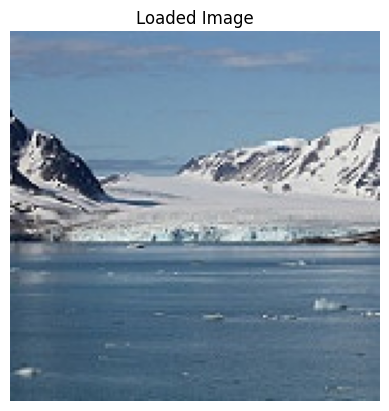

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: glacier (index: 2)


In [110]:
display_random_image_and_predict()